<a href="https://colab.research.google.com/github/bomiiisong/DeepLearning-with-Python/blob/master/DNN/DNN_Modeling_for_Overfitting_fashion_mnist_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNN Modeling with Fashion MNIST Datasets

In [ ]:
import warnings
warnings.filterwarnings('ignore')

> ## Ⅰ. Import Keras & Load Dataset

* keras version check

In [ ]:
import keras
keras.__version__

'2.4.3'

* Fashion MNIST data load

In [ ]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


* train data shape check

In [ ]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)
60000
[9 0 0 3 0]


* test data shape check

In [ ]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[9 2 1 1 6]


* data visualization

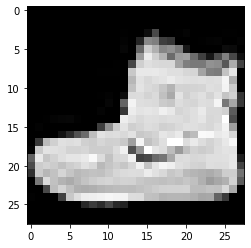

In [ ]:
import matplotlib.pyplot as plt

digit = X_train[0]
plt.imshow(digit, cmap = 'gray')
plt.show()

* data array check

In [ ]:
import numpy as np
np.set_printoptions(linewidth = 150)

print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

## Ⅱ. Data Preprocessing

 > ### 1. input data reshape

* reshape to 1D array

In [ ]:
X_train = X_train.reshape((60000, 28*28))
X_test = X_test.reshape((10000, 28*28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

> ### 2. input data Normalization

In [ ]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [ ]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

> ### 3. label(y) one-hot encoding

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(y_train[:3])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Ⅲ. Modeling

> ### 1) Basic DNN

* Model Define

In [ ]:
from keras import models
from keras import layers

fashion = models.Sequential(name='classifier')
fashion.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
fashion.add(layers.Dense(256, activation='relu'))
fashion.add(layers.Dense(10, activation='softmax'))

In [ ]:
fashion.summary()

Model: "classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fashion.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
# epochs 100

%%time

Hist_fashion = fashion.fit(X_train, y_train, epochs=100,
                       batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 0.6733 - accuracy: 0.7618 - val_loss: 0.4085 - val_accuracy: 0.8515
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3770 - accuracy: 0.8622 - val_loss: 0.3632 - val_accuracy: 0.8659
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3311 - accuracy: 0.8783 - val_loss: 0.3454 - val_accuracy: 0.8757
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3028 - accuracy: 0.8881 - val_loss: 0.3357 - val_accuracy: 0.8789
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2834 - accuracy: 0.8952 - val_loss: 0.3276 - val_accuracy: 0.8847
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2651 - accuracy: 0.9020 - val_loss: 0.3091 - val_accuracy: 0.8907
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2513 - accuracy: 0.9045 - val_loss: 0.3261 - val_accuracy: 0.8885

#### Base DNN Model Capacity

In [ ]:
basic2_loss, basic2_accuracy = fashion.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(basic2_loss))
print('Accuracy = {:.5f}'.format(basic2_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.9064 - accuracy: 0.8964
Loss = 0.90645
Accuracy = 0.89640


* Model별 Capacity Save

In [ ]:
capacity = []
capacity.append(('basic', basic2_loss, basic2_accuracy))

* Base DNN Loss Visualization

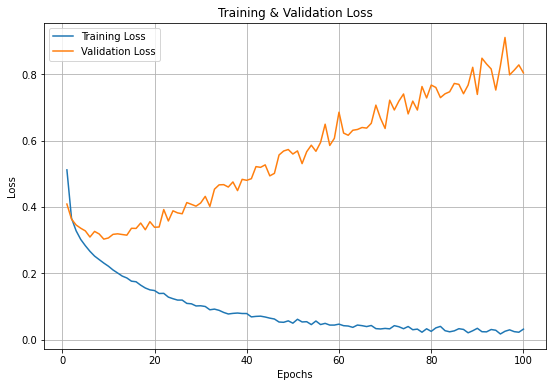

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_fashion.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_fashion.history['loss'])
plt.plot(epochs, Hist_fashion.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

## Ⅳ. Overfitting 처리


*   Model_Capacity 조정
*   Regularization
*   Dropout
*   BatchNormalization
*   결합 : Dropout+BN

> ### 1. Model capacity 조정

* Dense Layer 줄이기

In [ ]:
from keras import models
from keras import layers

fashion = models.Sequential(name='reduce_capacity')
fashion.add(layers.Dense(256, activation='relu', input_shape=(28*28,)))
fashion.add(layers.Dense(10, activation='softmax'))

In [ ]:
fashion.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
%%time

Hist_fashion = fashion.fit(X_train, y_train, epochs=100,
                       batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 0.7259 - accuracy: 0.7530 - val_loss: 0.4409 - val_accuracy: 0.8427
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4141 - accuracy: 0.8546 - val_loss: 0.4073 - val_accuracy: 0.8584
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3692 - accuracy: 0.8692 - val_loss: 0.3848 - val_accuracy: 0.8611
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3389 - accuracy: 0.8773 - val_loss: 0.3521 - val_accuracy: 0.8776
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3162 - accuracy: 0.8826 - val_loss: 0.3479 - val_accuracy: 0.8750
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2991 - accuracy: 0.8918 - val_loss: 0.3256 - val_accuracy: 0.8846
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2821 - accuracy: 0.8968 - val_loss: 0.3258 - val_accuracy: 0.8821

#### Reduce Capacity Model result

In [ ]:
capacity_loss, capacity_accuracy = fashion.evaluate(X_test, y_test)
capacity.append(('adj_Model_capacity', capacity_loss, capacity_accuracy))

print('Loss = {:.5f}'.format(capacity_loss))
print('Accuracy = {:.5f}'.format(capacity_accuracy))

> ### 2. Regularization(L1, L2) 적용

* L1

In [ ]:
# L1

from keras import models
from keras import layers
from keras import regularizers

fashion = models.Sequential(name='regular_1')
fashion.add(layers.Dense(512, activation='relu', kernel_regularizer='l1', input_shape=(28*28,)))
fashion.add(layers.Dense(256, activation='relu'))
fashion.add(layers.Dense(10, activation='softmax'))

In [ ]:
fashion.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
%%time

Hist_fashion = fashion.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 32.3823 - accuracy: 0.6691 - val_loss: 1.4726 - val_accuracy: 0.7688
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 1.4524 - accuracy: 0.7667 - val_loss: 1.4058 - val_accuracy: 0.7751
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 1.3583 - accuracy: 0.7868 - val_loss: 1.2735 - val_accuracy: 0.7995
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 1.2913 - accuracy: 0.7936 - val_loss: 1.3212 - val_accuracy: 0.7939
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 1.2550 - accuracy: 0.8035 - val_loss: 1.2663 - val_accuracy: 0.7913
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 1.2543 - accuracy: 0.8063 - val_loss: 1.3334 - val_accuracy: 0.7774
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 1.2173 - accuracy: 0.8121 - val_loss: 1.2189 - val_accuracy: 0.811

#### L1 Model Capacity

In [ ]:
l1_loss, l1_accuracy = fashion.evaluate(X_test, y_test)
capacity.append(('L1', l1_loss, l1_accuracy))

print('Loss = {:.5f}'.format(l1_loss))
print('Accuracy = {:.5f}'.format(l1_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 1.0708 - accuracy: 0.8356
Loss = 1.07080
Accuracy = 0.83560


* L2

In [ ]:
# L2

from keras import models
from keras import layers
from keras import regularizers

fashion = models.Sequential(name='regular_2')
fashion.add(layers.Dense(512, activation='relu', kernel_regularizer='l2', input_shape=(28*28,)))
fashion.add(layers.Dense(256, activation='relu'))
fashion.add(layers.Dense(10, activation='softmax'))

In [ ]:
fashion.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
%%time

Hist_fashion = fashion.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 3ms/step - loss: 2.7442 - accuracy: 0.7486 - val_loss: 0.6525 - val_accuracy: 0.8104
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.6029 - accuracy: 0.8289 - val_loss: 0.5727 - val_accuracy: 0.8281
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5562 - accuracy: 0.8356 - val_loss: 0.5320 - val_accuracy: 0.8450
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5282 - accuracy: 0.8458 - val_loss: 0.5263 - val_accuracy: 0.8425
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5130 - accuracy: 0.8475 - val_loss: 0.5020 - val_accuracy: 0.8473
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4757 - accuracy: 0.8598 - val_loss: 0.4718 - val_accuracy: 0.8573
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4808 - accuracy: 0.8526 - val_loss: 0.4747 - val_accuracy: 0.8572

#### L2 Model Capacity

In [ ]:
l2_loss, l2_accuracy = fashion.evaluate(X_test, y_test)
capacity.append(('L2', l2_loss, l2_accuracy))

print('Loss = {:.5f}'.format(l2_loss))
print('Accuracy = {:.5f}'.format(l2_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.4895 - accuracy: 0.8476
Loss = 0.48949
Accuracy = 0.84760


> ### 3. Dropout

In [ ]:
from keras import models
from keras import layers

fashion = models.Sequential(name='dropout')
fashion.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
fashion.add(layers.Dropout(0.4))
fashion.add(layers.Dense(256, activation='relu'))
fashion.add(layers.Dropout(0.2))
fashion.add(layers.Dense(10, activation='softmax'))

In [ ]:
fashion.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
%%time

Hist_fashion = fashion.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 3ms/step - loss: 0.7925 - accuracy: 0.7195 - val_loss: 0.4121 - val_accuracy: 0.8470
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4407 - accuracy: 0.8392 - val_loss: 0.3783 - val_accuracy: 0.8620
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3981 - accuracy: 0.8564 - val_loss: 0.3488 - val_accuracy: 0.8727
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3715 - accuracy: 0.8655 - val_loss: 0.3426 - val_accuracy: 0.8731
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3481 - accuracy: 0.8700 - val_loss: 0.3473 - val_accuracy: 0.8696
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3419 - accuracy: 0.8721 - val_loss: 0.3391 - val_accuracy: 0.8722
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3327 - accuracy: 0.8759 - val_loss: 0.3296 - val_accuracy: 0.8780

#### Dropout Model Capacity

In [ ]:
drop_loss, drop_accuracy = fashion.evaluate(X_test, y_test)
capacity.append(('Dropout', drop_loss, drop_accuracy))

print('Loss = {:.5f}'.format(drop_loss))
print('Accuracy = {:.5f}'.format(drop_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.3898 - accuracy: 0.8959
Loss = 0.38981
Accuracy = 0.89590


> ### 4. Batch Normalization

In [ ]:
from keras import models
from keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Dense(256))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(10, activation='softmax'))

In [ ]:
fashion.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
%%time

Hist_fashion = fashion.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0969 - accuracy: 0.9642 - val_loss: 0.4468 - val_accuracy: 0.9021
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1017 - accuracy: 0.9618 - val_loss: 0.4641 - val_accuracy: 0.8991
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0974 - accuracy: 0.9636 - val_loss: 0.4182 - val_accuracy: 0.9054
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0935 - accuracy: 0.9653 - val_loss: 0.4373 - val_accuracy: 0.9036
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0933 - accuracy: 0.9668 - val_loss: 0.4103 - val_accuracy: 0.9047
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0926 - accuracy: 0.9644 - val_loss: 0.4447 - val_accuracy: 0.9021
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0907 - accuracy: 0.9664 - val_loss: 0.4255 - val_accuracy: 0.9030

#### Batch Normalization Model Capacity

In [ ]:
BN_loss, BN_accuracy = fashion.evaluate(X_test, y_test)
capacity.append(('BN', BN_loss, BN_accuracy))

print('Loss = {:.5f}'.format(BN_loss))
print('Accuracy = {:.5f}'.format(BN_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.5265 - accuracy: 0.9014
Loss = 0.52649
Accuracy = 0.90140


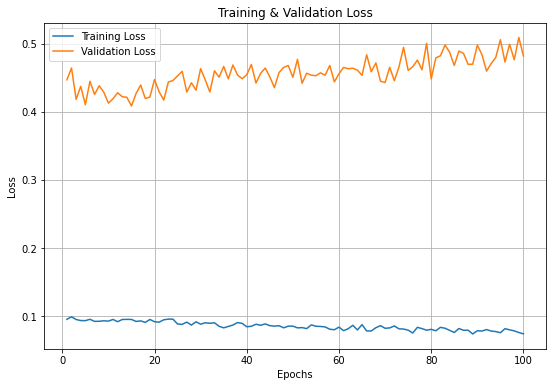

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_fashion.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_fashion.history['loss'])
plt.plot(epochs, Hist_fashion.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

# 띠용.........gap 이 줄어 들지 않음.....

In [ ]:
capacity

[('basic', 0.906448245048523, 0.896399974822998),
 ('adj_Model_capacity', 0.6721039414405823, 0.888700008392334),
 ('L1', 1.0707978010177612, 0.8356000185012817),
 ('L2', 0.48948609828948975, 0.847599983215332),
 ('Dropout', 0.3898071348667145, 0.8959000110626221),
 ('BN', 0.4682590961456299, 0.9009000062942505)]

> ### 5. Combine Model [Batch Normalization + Dropout]

In [ ]:
from keras import backend as K

K.clear_session()

In [ ]:
from keras import models
from keras import layers

fashion = models.Sequential()
fashion.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
fashion.add(layers.Dropout(0.4))
fashion.add(layers.BatchNormalization())
fashion.add(layers.Dense(256))
fashion.add(layers.Dropout(0.2))
fashion.add(layers.BatchNormalization())
fashion.add(layers.Activation('relu'))
fashion.add(layers.Dense(10, activation='softmax'))

In [ ]:
fashion.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
# epochs 100

%%time

Hist_fashion = fashion.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 0.7084 - accuracy: 0.7534 - val_loss: 0.4363 - val_accuracy: 0.8378
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 0.4501 - accuracy: 0.8357 - val_loss: 0.4087 - val_accuracy: 0.8487
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4178 - accuracy: 0.8467 - val_loss: 0.3878 - val_accuracy: 0.8530
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.4086 - accuracy: 0.8477 - val_loss: 0.4420 - val_accuracy: 0.8409
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.3895 - accuracy: 0.8570 - val_loss: 0.3738 - val_accuracy: 0.8619
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.3755 - accuracy: 0.8607 - val_loss: 0.3671 - val_accuracy: 0.8638
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3694 - accuracy: 0.8641 - val_loss: 0.3407 - val_accuracy: 0.8721

#### Combine Model Capacity

In [ ]:
bn_drop_loss, bn_drop_accuracy = fashion.evaluate(X_test, y_test)
capacity.append(('BN_Drop', bn_drop_loss, bn_drop_accuracy))

print('Loss = {:.5f}'.format(bn_drop_loss))
print('Accuracy = {:.5f}'.format(bn_drop_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.3386 - accuracy: 0.8931
Loss = 0.33862
Accuracy = 0.89310


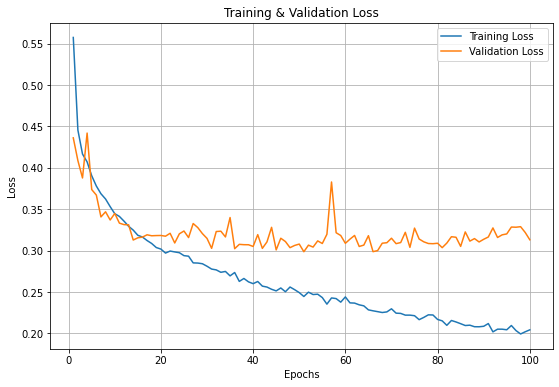

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_fashion.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_fashion.history['loss'])
plt.plot(epochs, Hist_fashion.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ### 6. callbacks Model <br>

* callback은 epochs를 높게 주는 것이 좋음
* patience 는 기본 모델의 패턴을 보고 결정

In [ ]:
from keras import backend as K

K.clear_session()

In [ ]:
from keras import models
from keras import layers

fashion = models.Sequential(name='EarlyStopping')
fashion.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
fashion.add(layers.Dense(265, activation='relu'))
fashion.add(layers.Dense(10, activation='softmax'))

fashion.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_accuracy',
                   mode='max',
                   patience=50,
                   verbose=1)

In [ ]:
from keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_fashion_mnist.h5',
                     monitor='val_accuracy',
                     mode='max',
                     save_best_only=True,
                     verbose=1)

In [ ]:
%%time

Hist_fashion = fashion.fit(X_train, y_train, epochs=100, batch_size=128, callbacks=[es, mc], validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0376 - accuracy: 0.9890 - val_loss: 1.0581 - val_accuracy: 0.8970

Epoch 00001: val_accuracy improved from -inf to 0.89700, saving model to best_fashion_mnist.h5
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 1.1442 - val_accuracy: 0.8978

Epoch 00002: val_accuracy improved from 0.89700 to 0.89783, saving model to best_fashion_mnist.h5
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0079 - accuracy: 0.9973 - val_loss: 1.1619 - val_accuracy: 0.8981

Epoch 00003: val_accuracy improved from 0.89783 to 0.89808, saving model to best_fashion_mnist.h5
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0132 - accuracy: 0.9964 - val_loss: 1.1826 - val_accuracy: 0.8961

Epoch 00004: val_accuracy did not improve from 0.89808
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0

In [ ]:
!ls -l

total 6372
-rw-r--r-- 1 root root 6519036 Mar 19 07:56 best_fashion_mnist.h5
drwxr-xr-x 1 root root    4096 Mar  5 14:37 sample_data


#### Callback Model Capacity

In [ ]:
callback_loss, callback_accuracy = fashion.evaluate(X_test, y_test)
capacity.append(('callbacks', callback_loss, callback_accuracy))

print('Loss = {:.5f}'.format(callback_loss))
print('Accuracy = {:.5f}'.format(callback_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 1.4083 - accuracy: 0.8902
Loss = 1.40827
Accuracy = 0.89020


## Ⅴ. Final Result




* Model Capacity

In [ ]:
result = pd.DataFrame(data=capacity)
result.sort_values(by=['accuracy'], ascending=False, inplace=True)

In [ ]:
result

,Model,Loss,accuracy
0,basic,0.906448,0.8964
1,adj_Model_capacity,0.672104,0.8887
2,L1,1.070798,0.8356
3,L2,0.489486,0.8476
4,Dropout,0.389807,0.8959
5,BN,0.468259,0.9009
6,BN_Drop,0.338616,0.8931
7,callbacks,1.408270,0.8902


* visualization

Text(0, 0.5, 'Accuracy')

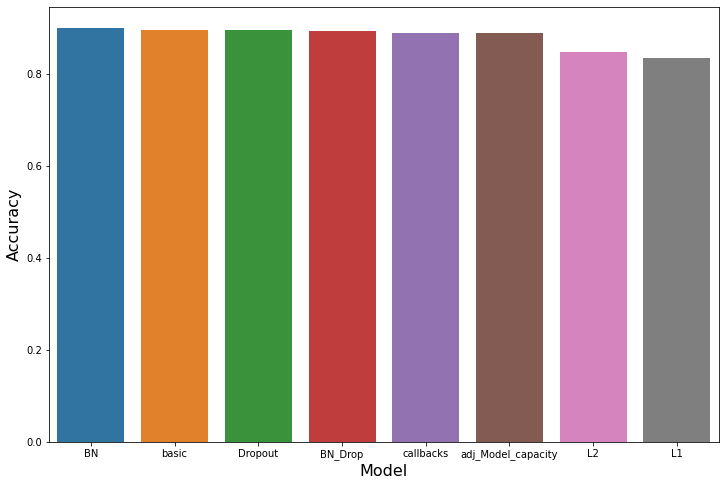

In [ ]:
# accuracy 기준

import seaborn as sns

result.sort_values(by=['accuracy'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(12,8))
sns.barplot(x='Model', y='accuracy', data=result, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('Accuracy', size=16)

Text(0, 0.5, 'Loss')

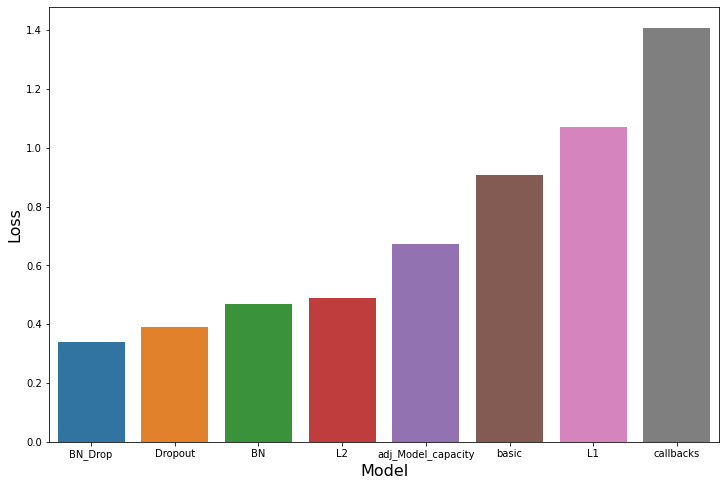

In [ ]:
# Loss 기준

result.sort_values(by=['Loss'], ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(12,8))
sns.barplot(x='Model', y='Loss', data=result, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('Loss', size=16)

## Ⅵ. 실습 리뷰

* 전체 리뷰
    * callback
        * callback 모델에서는 epochs 를 높이는 것이 좋음
        * patience 는 기본 모델의 패턴을 보고 결정

    * model session
        * 같은 모델 명으로 학습시키면. 파라미터가 지속적으로 학습되어 결과가 왜곡될 수 있음
        * session 초기화 or 개별적으로 모델링 하는 것 필요 (학습이 누적되기 때문)

    * plot 시각화
        * loss, accuracy 둘 다 그려보기 -> subplot 으로 그려보기

* 내 코드 리뷰
    * session 종료 후 다시
    * optimization method 변경해가며 비교
    * loss는 잘 모름, accuracy 로 성능 확인
